In [1]:
import pandas as pd

In [2]:
def import_haplotype_accessions(enzyme):
    df = pd.read_csv(f"./outputs/haplotypes_accessions_{enzyme}.csv")
    df['enzyme'] = enzyme
    df.drop(df.columns[0], axis=1, inplace=True)
    return df

enzymes = ["AluI", "HpaII", "MspI", "RsaI"]
data = pd.DataFrame(columns=["enzyme", "hap_id", "hap", "sample", "accession"])
for e in enzymes:
    data = data.append(import_haplotype_accessions(e))

data.head()

,enzyme,hap_id,hap,sample,accession
0,AluI,1,AL1,S_MN493917.1,MN493917.1
1,AluI,1,AL1,S_MN493918.1,MN493918.1
2,AluI,2,AL2,S_MN577382.1,MN577382.1
3,AluI,3,AL3,S_MN577386.1,MN577386.1
4,AluI,4,AL4,S_MN493881.1,MN493881.1


In [3]:
from itertools import groupby

# filter having entries of 4 restriction enzyme
data_filteres = data.groupby('accession').filter(lambda x: len(x.enzyme.unique()) == 4) 

hap_comb = data_filteres.groupby('accession').apply(lambda x: [list(i) for j, i in groupby(list(x.hap), lambda a: a[0:2])]).reset_index().rename({0: 'hap_comb'}, axis=1)
hap_comb

,accession,hap_comb
0,MN493874.1,"[[AL36], [HP35, HP36], [MS35, MS36], [RS37]]"
1,MN493876.1,"[[AL36], [HP35, HP36], [MS35, MS36], [RS37]]"
2,MN493878.1,"[[AL23], [HP23], [MS23], [RS23]]"
3,MN493879.1,"[[AL20, AL22], [HP22], [MS22], [RS22]]"
4,MN493884.1,"[[AL25, AL26], [HP26], [MS26], [RS26]]"
5,MN493888.1,"[[AL33, AL34], [HP32, HP33, HP34], [MS32, MS33..."
6,MN493889.1,"[[AL33], [HP32, HP33], [MS32, MS33], [RS29, RS..."
7,MN493890.1,"[[AL8, AL10], [HP8, HP10, HP14], [MS8, MS10, M..."
8,MN493896.1,"[[AL28, AL29], [HP29], [MS29], [RS29]]"
9,MN493898.1,"[[AL24], [HP24], [MS24], [RS24]]"


In [22]:
import networkx as nx
# hap_comb
# h = [["AL36", "AL37"], ["HP35", "HP36"], ["MS35", "MS36"], ["RS37"]]
phylo_list = []

def create_adj_matrix(node_list, accn):
    #adj_mat = pd.DataFrame(columns=['source', 'target'])
    adj_mat = []
    for i, e in enumerate(node_list):
        if i < len(node_list) - 1:
            for h in e:
                for j in node_list[i + 1]:
                    adj_mat.append((h, j))
                    # adj_mat = adj_mat.append({
                    # "source": h,
                    # "target": j,
                    # }, ignore_index=True)
    
    G = nx.DiGraph()
    G.add_edges_from(adj_mat)
    #G = nx.from_pandas_edgelist(adj_mat, source="source", target="target", edge_attr="weight")
    
    sources = node_list[0]
    targets = node_list[len(node_list) - 1]
    
    for s in sources:
        for t in targets:
            for path in nx.all_simple_paths(G, source=s, target=t):
                phylo_list.append([accn, "-".join(path)])

for idx, r in hap_comb.iterrows():
    create_adj_matrix(r['hap_comb'], r["accession"])

phylotypes = pd.DataFrame(phylo_list, columns=['accession', 'phylotype'])
phylotypes.head()

,accession,phylotype
0,MN493874.1,AL36-HP35-MS35-RS37
1,MN493874.1,AL36-HP35-MS36-RS37
2,MN493874.1,AL36-HP36-MS35-RS37
3,MN493874.1,AL36-HP36-MS36-RS37
4,MN493876.1,AL36-HP35-MS35-RS37


In [23]:
phylotypes.to_csv('./outputs/phylotypes.csv')

In [28]:
phylotypes
phylotypes.groupby('phylotype').apply(lambda x: ", ".join(x['accession'])).reset_index(name="accessions")

,phylotype,accessions
0,AL1-HP1-MS1-RS1,"MN493917.1, MN493918.1"
1,AL1-HP1-MS4-RS1,"MN493917.1, MN493918.1"
2,AL1-HP4-MS1-RS1,"MN493917.1, MN493918.1"
3,AL1-HP4-MS4-RS1,"MN493917.1, MN493918.1"
4,AL10-HP10-MS10-RS12,"MN493890.1, MN577372.1, MN577384.1"
...,...,...
171,AL8-HP8-MS14-RS12,"MN493890.1, MN577372.1, MN577384.1"
172,AL8-HP8-MS8-RS12,"MN493890.1, MN577372.1, MN577384.1"
173,AL9-HP9-MS9-RS20,MN577367.1
174,AL9-HP9-MS9-RS27,MN577367.1


# Construct binary matrix based on phylotype

In [42]:
phylotype_2 = phylotypes
phylotype_2['presence'] = 1
phylotype_2['phylo_id'] = phylotype_2.groupby('phylotype').grouper.group_info[0]
phylotype_2['phylo_name'] = "IP" + (phylotype_2["phylo_id"] + 1).astype(str)
phylotype_2.head()

,accession,phylotype,presence,phylo_name,phylo_id
0,MN493874.1,AL36-HP35-MS35-RS37,1,IP138,137
1,MN493874.1,AL36-HP35-MS36-RS37,1,IP139,138
2,MN493874.1,AL36-HP36-MS35-RS37,1,IP140,139
3,MN493874.1,AL36-HP36-MS36-RS37,1,IP141,140
4,MN493876.1,AL36-HP35-MS35-RS37,1,IP138,137


In [44]:
bin_mat = phylotype_2[['phylo_name', 'accession', 'presence']].pivot(index='accession', columns='phylo_name',values='presence')
bin_mat = bin_mat.fillna(0)
bin_mat.head()

phylo_name,IP1,IP10,IP100,IP101,IP102,IP103,IP104,IP105,IP106,IP107,...,IP90,IP91,IP92,IP93,IP94,IP95,IP96,IP97,IP98,IP99
accession,,,,,,,,,,,,,,,,,,,,,
MN493874.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MN493876.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MN493878.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MN493879.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MN493884.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
bin_mat.to_csv('./outputs/phylotype_bin_matrix.csv')

In [54]:
bin_mat.shape

(36, 176)

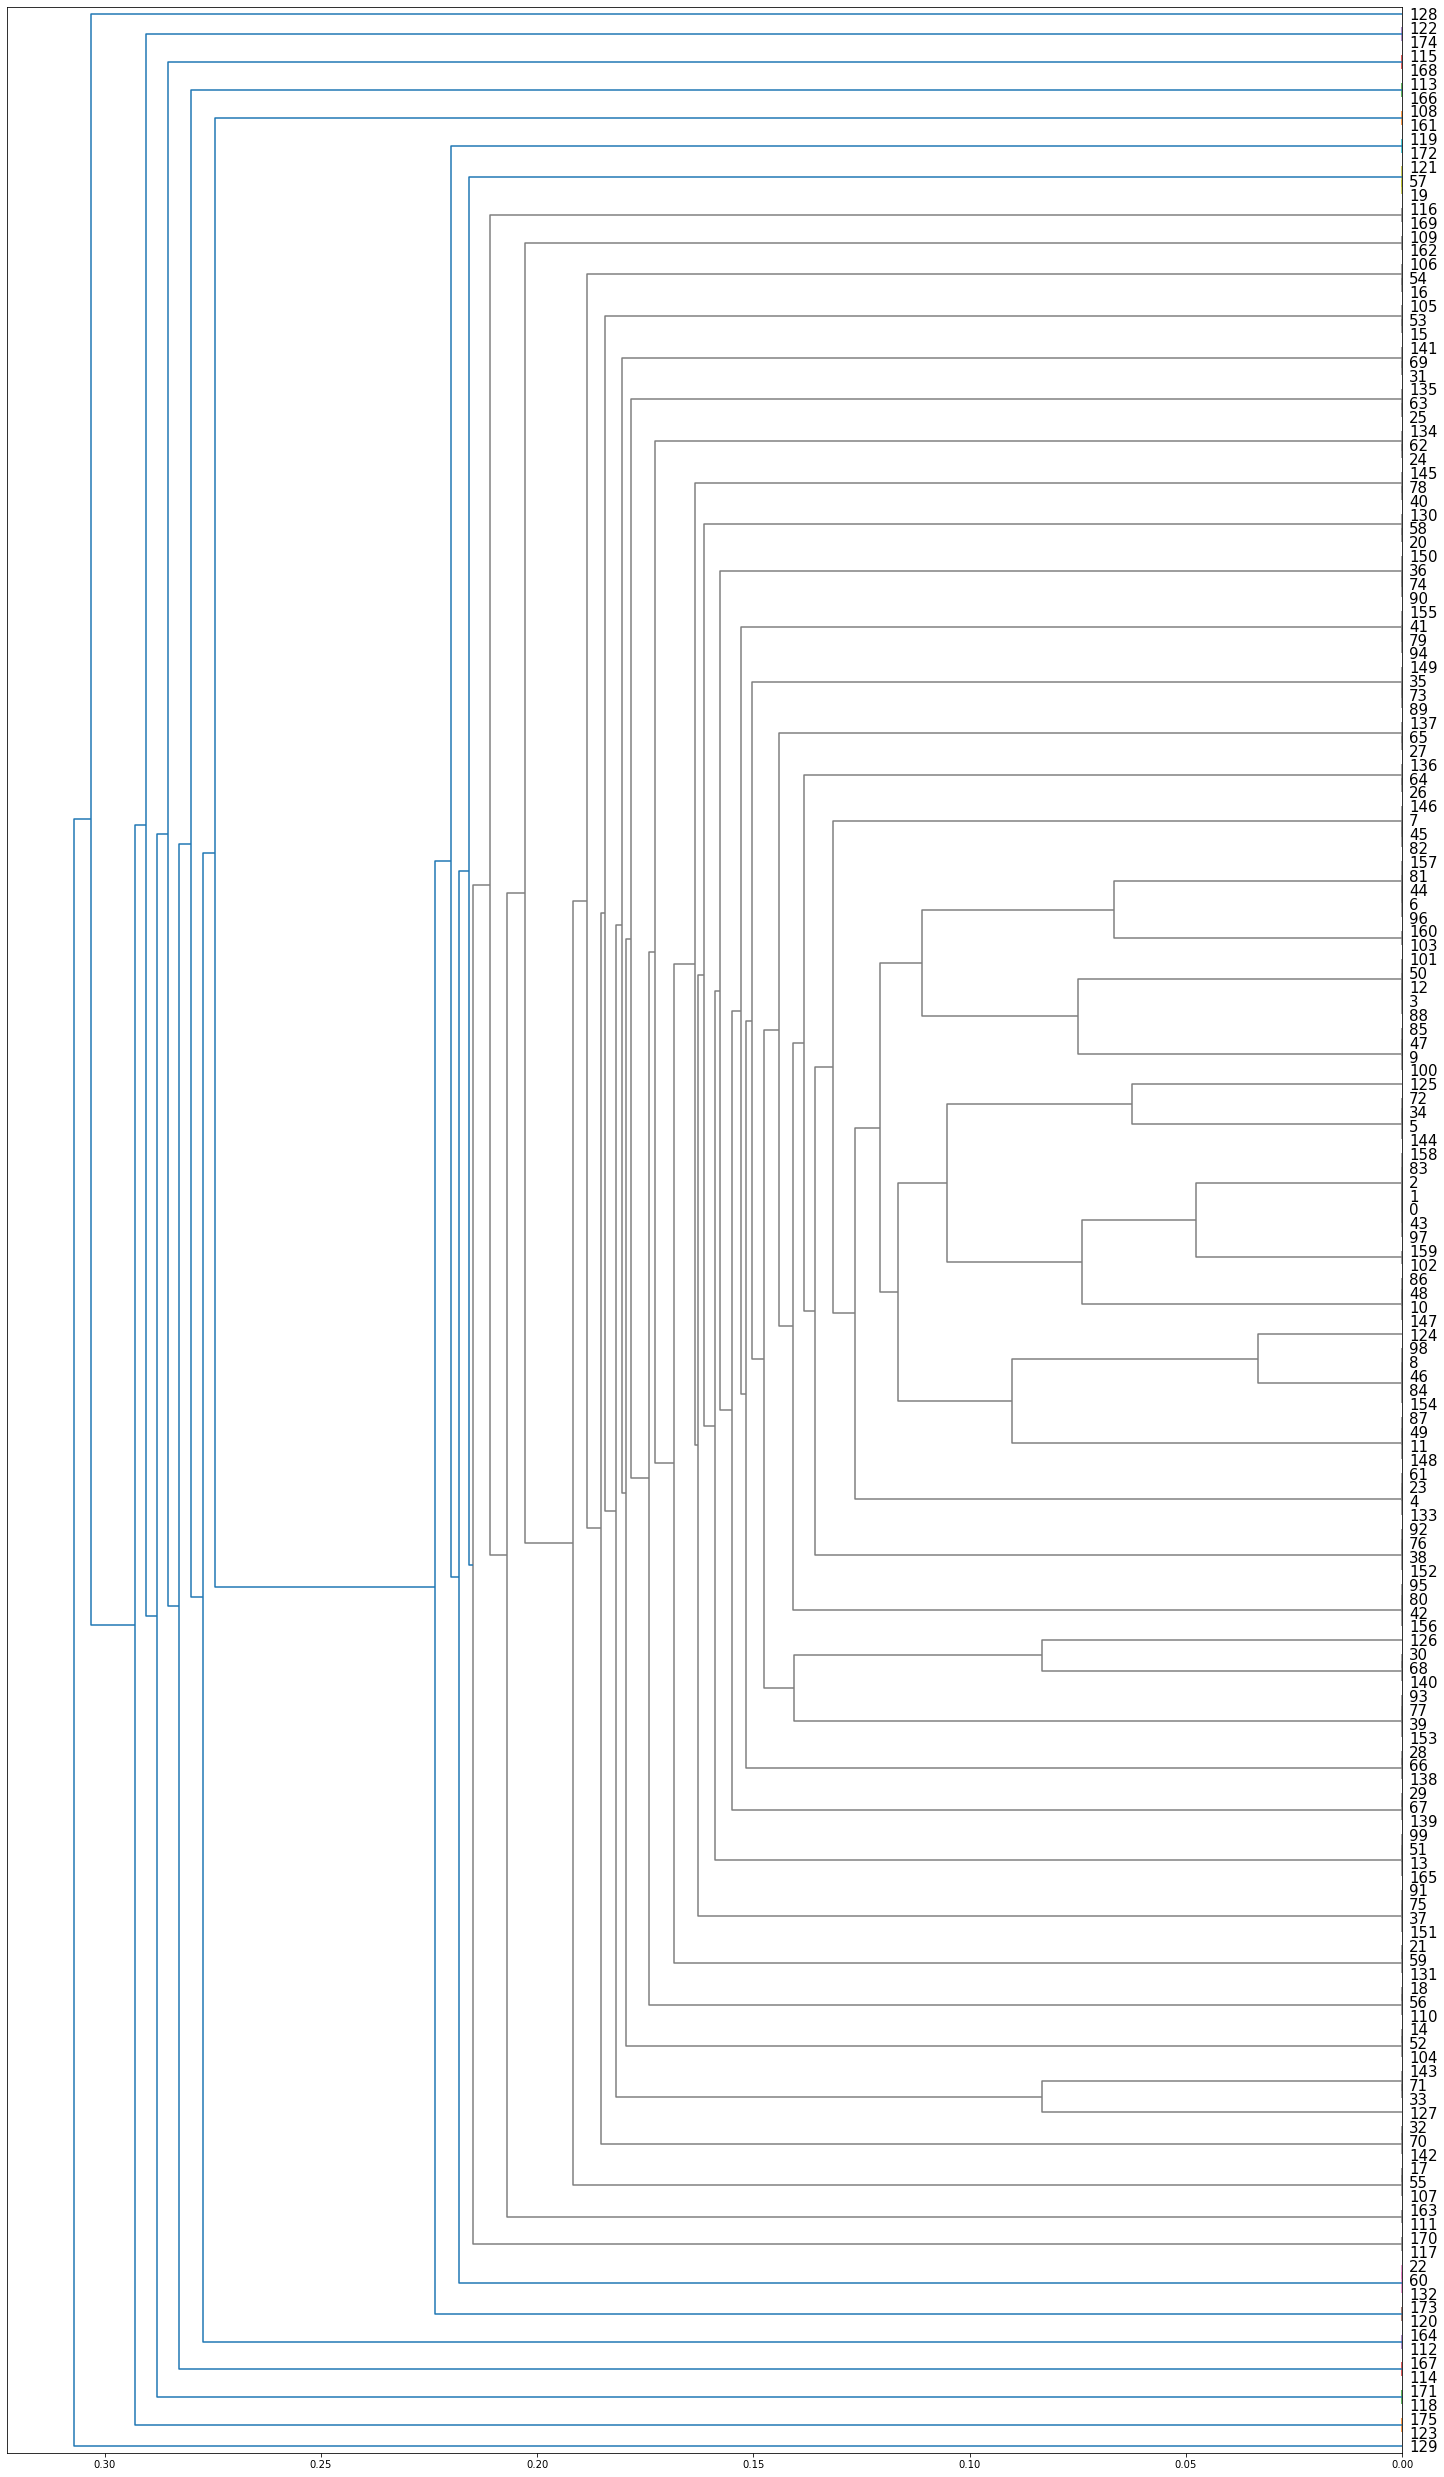

In [53]:
from scipy.spatial import distance
from scipy import cluster
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

dist_mat = 1 - distance.pdist(bin_mat.transpose().astype('bool'), 'jaccard')
linkage = cluster.hierarchy.linkage(dist_mat, method='average', optimal_ordering = True)
fig = plt.figure(figsize=(25, 45))
dn = cluster.hierarchy.dendrogram(linkage, 
                                  orientation='left', 
                                  leaf_font_size=15,
                                  #labels=labels
                                  )